# <font color=green>OSA case study</font>
## <font color=dark>Feature Selection: 1.- Filter, Univariate <font>


### See some references on Feature Selection such as:

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest

<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Read the aggregated (clinical variables + speecg featores) Excel file for exteme male cases

In [1]:
# Import pandas
import pandas as pd

# Read Excell with extreme male cases
file = 'OSA_Aggregated_UPM.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Sheet1']


In [2]:

# Load a sheet into a DataFrame by name: df_OSA_extreme
df_OSA_inner = xl.parse('Sheet1')

In [3]:
df_OSA_inner.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720


<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Remember operations using groupby()

* ### See, for example [Summarising, aggregation and grouping data in python pandas](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [4]:
df_OSA_inner.groupby('OSA')['OSA'].describe()

,count,unique,top,freq
OSA,,,,
Healthy,91,1,Healthy,91
Severe,83,1,Severe,83


In [5]:
df_OSA_inner.groupby('OSA')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
OSA,,,,,,,,
Healthy,91.0,28.230731,4.125376,22.835010,25.452390,27.173119,30.103806,43.428571
Severe,83.0,32.333071,6.122230,21.357796,28.237795,31.314566,35.180151,52.298554


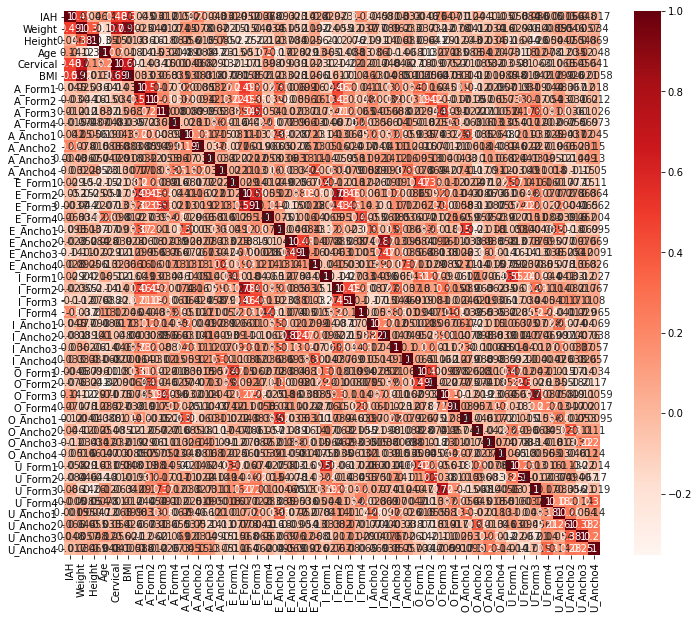

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_OSA_inner.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## For classification you can try:

### [AUC Meets the Wilcoxon-Mann-Whitney U-Statistic](https://blog.revolutionanalytics.com/2017/03/auc-meets-u-stat.html)


In [9]:

from scipy.stats import mannwhitneyu

List_Features = df_OSA_inner.columns[2:]

for FEAT in List_Features:
    data1 = df_OSA_inner[df_OSA_inner['OSA'] == 'Healthy'][FEAT]
    data2 = df_OSA_inner[df_OSA_inner['OSA'] != 'Healthy'][FEAT]
    stat, p = mannwhitneyu(data1, data2)
    if p < 0.01:
        print("Feature: ", FEAT, " p-value: ", p)


Feature:  IAH  p-value:  2.668948268665901e-30
Feature:  Weight  p-value:  1.0436965320992271e-06
Feature:  Age  p-value:  0.0022783299529905107
Feature:  Cervical  p-value:  1.3995233873782936e-09
Feature:  OSA  p-value:  8.3741911410896e-40
Feature:  BMI  p-value:  9.008366766130032e-08
Feature:  A_Ancho2  p-value:  0.003501353021712575
Feature:  E_Ancho3  p-value:  0.006629051435287094


## You can also use already implemented Feature Selection procedures

### For example scikit-learn: $SelectKBest$

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest


In [10]:
# Feature Selection with Univariate Statistical Tests 
#(Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# <font color=red>BUT: Know what you are doing!!!:</font>

### In https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
* Default is f_classif (see below “See also”). The default function only works with classification tasks.


* f_classif(X, y)
Compute the ANOVA F-value for the provided sample.

## ANOVA F-value For Feature Selection
[Feature selection ANOVA](https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/)

If the features are categorical, calculate a chi-square (χ2
) statistic between each feature and the target vector. However, if the features are quantitative, compute the ANOVA F-value between each feature and the target vector.



### ... for testing $SelectKbest$ we will use numpy arrays for features and outcome

In [11]:
array = df_OSA_inner.values

In [12]:
type(array)

numpy.ndarray

In [13]:
df_OSA_inner.head(5)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991,681.116563,...,468.000000,95.059357,370.154253,714.797758,2728.437822,3501.838315,92.078301,230.866726,87.218309,591.651748
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980,732.652369,...,107.256636,373.582142,303.000000,757.152778,2317.825661,4068.527272,197.000000,134.369532,190.933843,144.054887
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778,741.800273,...,163.917683,174.836713,287.000000,733.000000,2296.000000,2947.386531,74.000000,175.000000,274.000000,189.966079


In [14]:
import numpy as np

In [15]:
i = 0
for name in df_OSA_inner.iloc[:,np.r_[3:7,8:49]].columns:
    print('Features position: ',i, ' Name: ', name)
    i = i + 1

Features position:  0  Name:  Weight
Features position:  1  Name:  Height
Features position:  2  Name:  Age
Features position:  3  Name:  Cervical
Features position:  4  Name:  BMI
Features position:  5  Name:  A_Form1
Features position:  6  Name:  A_Form2
Features position:  7  Name:  A_Form3
Features position:  8  Name:  A_Form4
Features position:  9  Name:  A_Ancho1
Features position:  10  Name:  A_Ancho2
Features position:  11  Name:  A_Ancho3
Features position:  12  Name:  A_Ancho4
Features position:  13  Name:  E_Form1
Features position:  14  Name:  E_Form2
Features position:  15  Name:  E_Form3
Features position:  16  Name:  E_Form4
Features position:  17  Name:  E_Ancho1
Features position:  18  Name:  E_Ancho2
Features position:  19  Name:  E_Ancho3
Features position:  20  Name:  E_Ancho4
Features position:  21  Name:  I_Form1
Features position:  22  Name:  I_Form2
Features position:  23  Name:  I_Form3
Features position:  24  Name:  I_Form4
Features position:  25  Name:  I_Anc

In [16]:
# Select Features from columns 3 to 6 and 8 to 48
X = array[:,np.r_[3:7,8:49]]

In [17]:
# see the first case
X[0,:]

array([80, 173, 32, 40, 26.72992749507167, 746.8221183776997,
       1225.417574310374, 2508.306857300249, 3775.739466857687,
       159.5404873847764, 136.2623531818225, 210.54317145345,
       310.2823270797749, 444.3294162750191, 1923.198001862062,
       2413.099987792814, 3702.694970703126, 91.37773566245373,
       180.7225533485563, 238.6456325531061, 297.4802003859751,
       280.5177970886311, 2333.900631713689, 2675.771298218249,
       3629.788195801312, 54.76846122741624, 197.0948628425313,
       350.1517065048375, 191.838788318625, 521.014667129525,
       899.3915897369754, 2450.534996033251, 3436.611940002686,
       111.1138925076081, 105.3445897102618, 164.9530711651312,
       223.7715037346062, 328.0754999161064, 757.0329143524436,
       2565.730496215877, 3024.500134277626, 74.71807608604001,
       88.3313689231932, 128.4964569091531, 379.4321424484188],
      dtype=object)

In [18]:
# Classes are in possition 7 (OSA) 
Y = array[:,7]

In [19]:
Y[0:4]

array(['Healthy', 'Healthy', 'Severe', 'Severe'], dtype=object)

## The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [20]:
# feature selection
selector = SelectKBest(score_func=f_classif, k=4)
selector.fit(X, Y)

SelectKBest(k=4)

In [21]:
# Get the raw p-values for each feature
scores = selector.pvalues_

# ...as there are very small values you could  and transform from p-values into scores
#scores = -np.log10(selector.pvalues_)

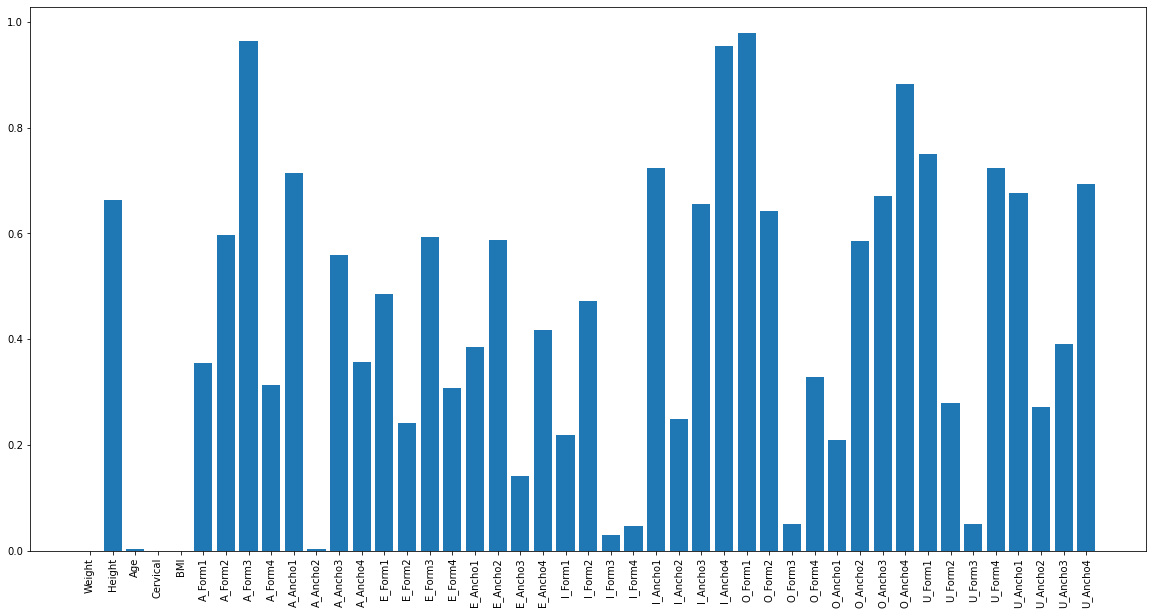

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

predictors = df_OSA_inner.columns[np.r_[3:7,8:49]]

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.figure(figsize=(20,10))
plt.bar(range(np.shape(X)[1]), scores)
plt.xticks(range(np.shape(X)[1]), predictors, rotation='vertical')
plt.show()

In [25]:
ifeat=0
for FEAT in predictors:
    p = selector.pvalues_[ifeat]
    ifeat = ifeat + 1
    if p < 0.05:
        print("Feature: ", FEAT, " p-value: ", p)

Feature:  Weight  p-value:  8.18200346766231e-07
Feature:  Age  p-value:  0.003197705106764703
Feature:  Cervical  p-value:  5.18199378130727e-09
Feature:  BMI  p-value:  5.029582313553199e-07
Feature:  A_Ancho2  p-value:  0.0037616243394976183
Feature:  I_Form3  p-value:  0.02979447496083049
Feature:  I_Form4  p-value:  0.04598472480960474
Feature:  O_Form3  p-value:  0.049349618595081454
